# Import Libraries

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load Dataset


In [66]:
df = pd.read_csv("C:\\Users\\tejas\\Downloads\\bbc-text.csv")
print("\nSample Data:\n", df.head())


Sample Data:
         category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...


In [67]:
print("Dataset Shape:", df.shape)
print("Category Distribution:\n", df['category'].value_counts())

Dataset Shape: (2225, 2)
Category Distribution:
 category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


# Data Preprocessing

In [69]:
# Download required NLTK data (only once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stopwords set and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a preprocessing function
def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove punctuation and numbers
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    
    # 3. Tokenize
    tokens = word_tokenize(text)
    
    # 4. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # 5. Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Return preprocessed text as a string or tokens as list
    return ' '.join(tokens)

# Apply preprocessing to the text column (replace 'text' with your actual text column name)
df['processed_text'] = df['text'].apply(preprocess_text)

# Check results
print(df[['text', 'processed_text']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text  \
0  tv future in the hands of viewers with home th...   
1  worldcom boss  left books alone  former worldc...   
2  tigers wary of farrell  gamble  leicester say ...   
3  yeading face newcastle in fa cup premiership s...   
4  ocean s twelve raids box office ocean s twelve...   

                                      processed_text  
0  tv future hand viewer home theatre system plas...  
1  worldcom bos left book alone former worldcom b...  
2  tiger wary farrell gamble leicester say rushed...  
3  yeading face newcastle fa cup premiership side...  
4  ocean twelve raid box office ocean twelve crim...  


# Feature Extraction

In [55]:
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)
X = tfidf.fit_transform(df["text"])
y = df["category"]


# Train/Test Split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Train Models

 Naive Bayes

In [57]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

Logistic Regression

In [58]:
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

Support Vector Machine (SVM)

In [59]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Model Evaluation

In [60]:
print("\n Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb,zero_division=0))


 Naive Bayes Results:
Accuracy: 0.9842696629213483
               precision    recall  f1-score   support

     business       0.97      0.97      0.97       102
entertainment       0.99      0.99      0.99        77
     politics       0.97      0.99      0.98        84
        sport       1.00      1.00      1.00       102
         tech       1.00      0.97      0.99        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



In [61]:
print("\n Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr,zero_division=0))


 Logistic Regression Results:
Accuracy: 0.9842696629213483
               precision    recall  f1-score   support

     business       0.97      0.98      0.98       102
entertainment       0.97      1.00      0.99        77
     politics       0.98      0.99      0.98        84
        sport       1.00      1.00      1.00       102
         tech       1.00      0.95      0.97        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



In [62]:
print("\n Support Vector Machine (SVM) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, zero_division=0))


 Support Vector Machine (SVM) Results:
Accuracy: 0.9842696629213483
               precision    recall  f1-score   support

     business       0.98      0.97      0.98       102
entertainment       0.97      1.00      0.99        77
     politics       0.98      0.99      0.98        84
        sport       1.00      1.00      1.00       102
         tech       0.99      0.96      0.97        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



# Visualization

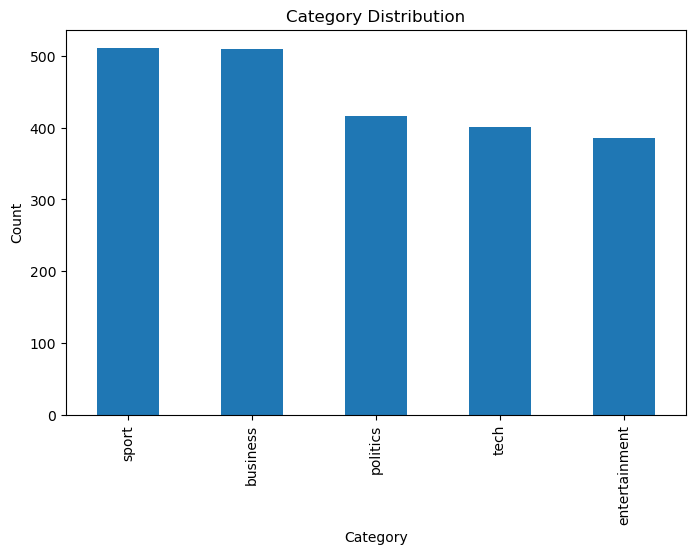

In [78]:
plt.figure(figsize=(8,5))
category_counts.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

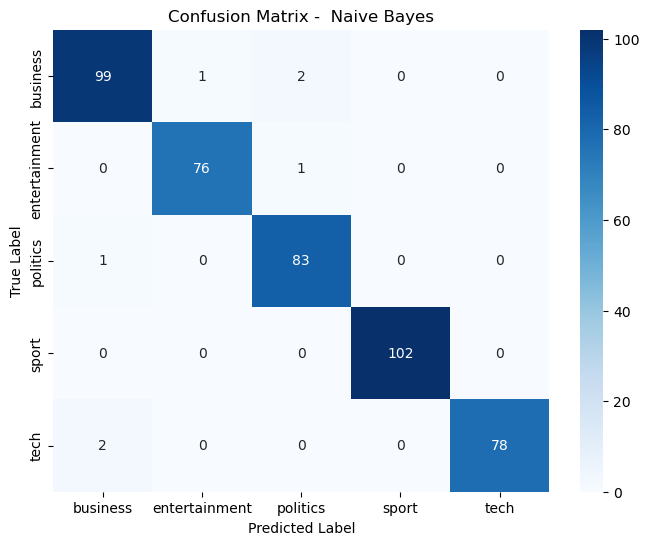

In [96]:
cm = confusion_matrix(y_test, y_pred_nb, labels=nb_model.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Confusion Matrix -  Naive Bayes")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

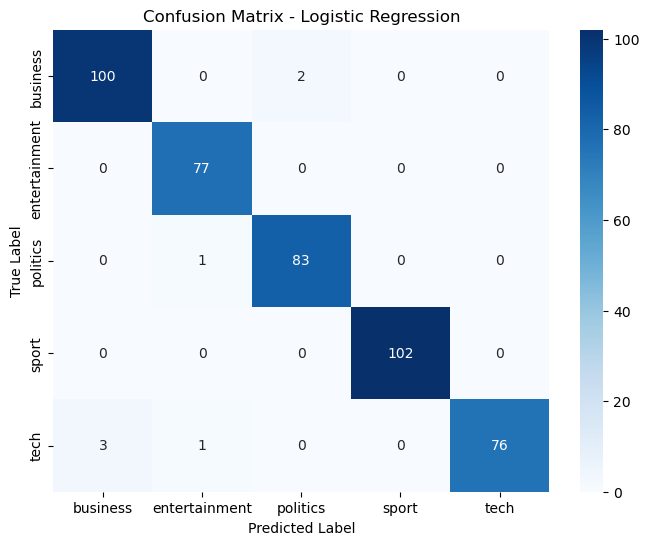

In [97]:
cm = confusion_matrix(y_test, y_pred_lr, labels=lr_model.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

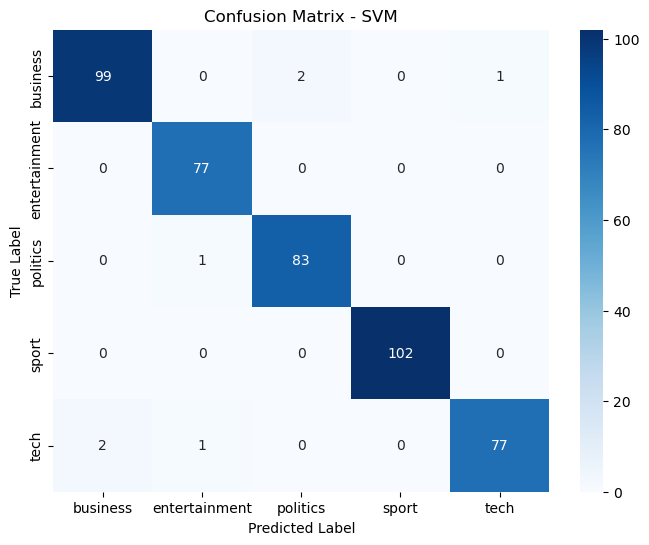

In [98]:
cm = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Confusion Matrix - SVM")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()